In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Question 13

In [3]:
#@title 13a
weekly = pd.read_csv('Weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [4]:
weekly.shape

(1089, 9)

In [6]:
weekly.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1089.0,2000.048669,6.033182,1990.000000,1995.000000,2000.00000,2005.000000,2010.000000
Lag1,1089.0,0.150585,2.357013,-18.195000,-1.154000,0.24100,1.405000,12.026000
Lag2,1089.0,0.151079,2.357254,-18.195000,-1.154000,0.24100,1.409000,12.026000
Lag3,1089.0,0.147205,2.360502,-18.195000,-1.158000,0.24100,1.409000,12.026000
Lag4,1089.0,0.145818,2.360279,-18.195000,-1.158000,0.23800,1.409000,12.026000
Lag5,1089.0,0.139893,2.361285,-18.195000,-1.166000,0.23400,1.405000,12.026000
Volume,1089.0,1.574618,1.686636,0.087465,0.332022,1.00268,2.053727,9.328214
Today,1089.0,0.149899,2.356927,-18.195000,-1.154000,0.24100,1.405000,12.026000


In [8]:
weekly.drop(columns=['Direction']).corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


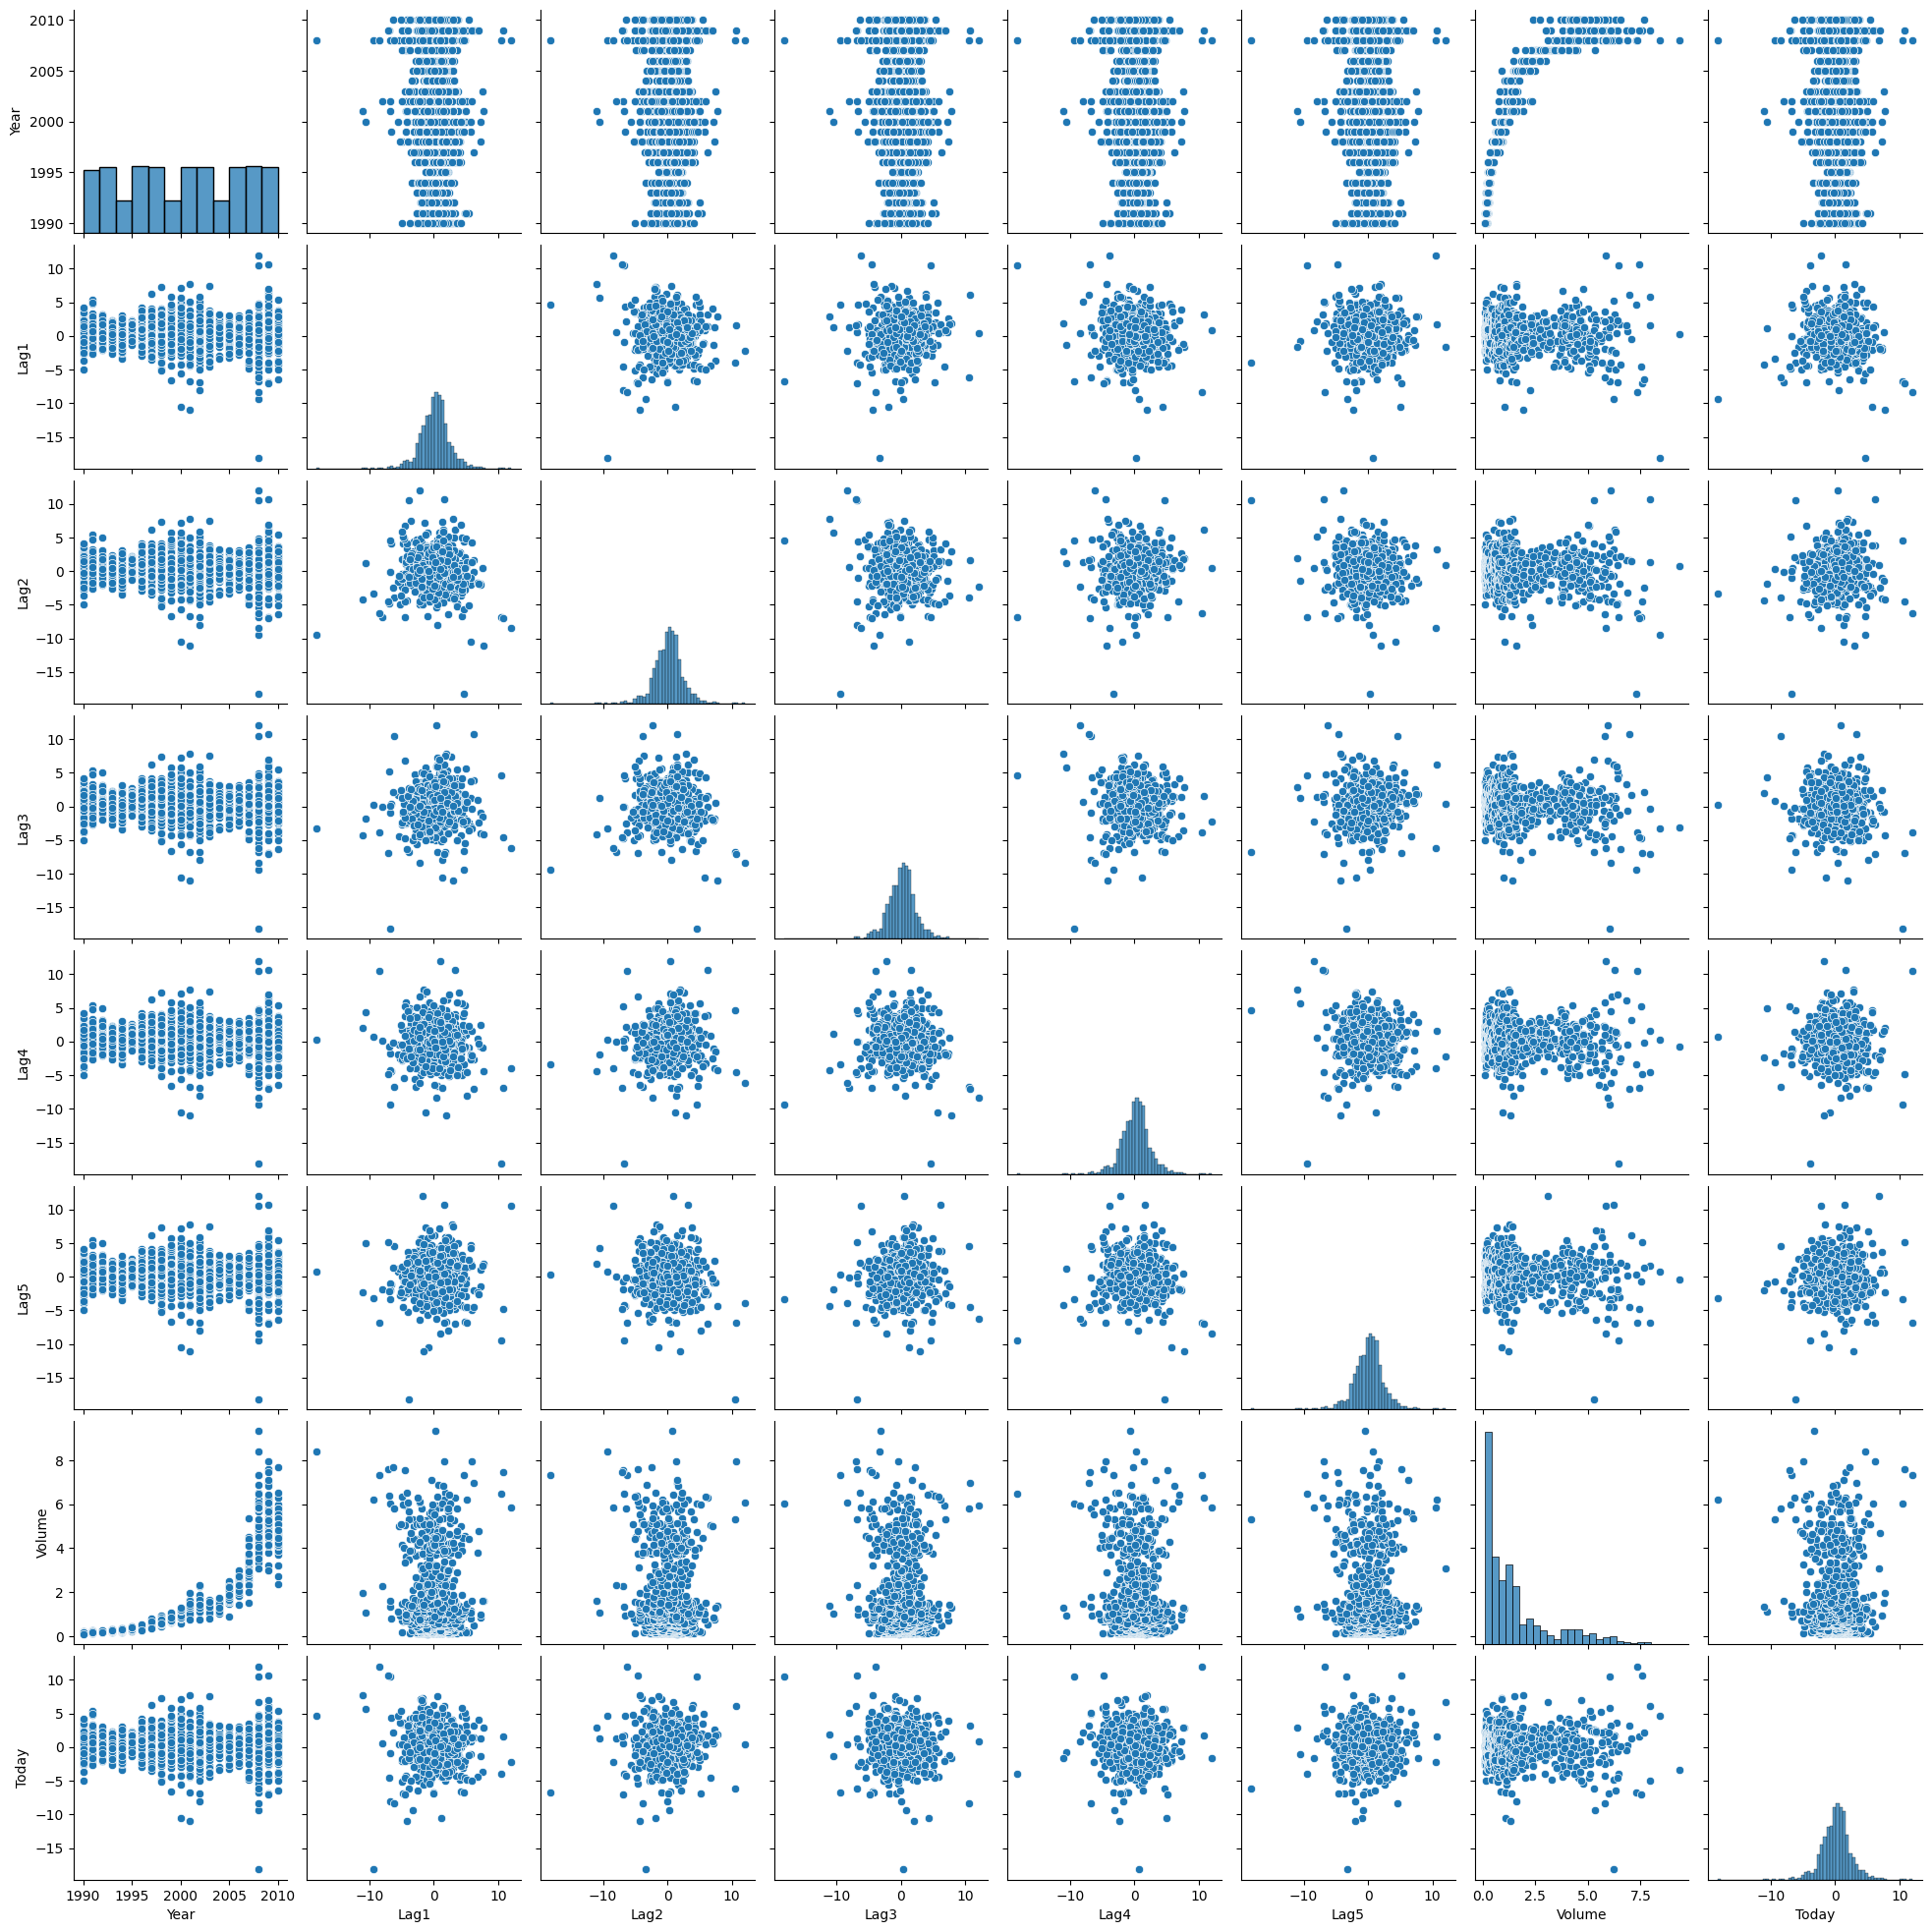

In [9]:
sns.pairplot(weekly)

As one would expect, the correlations between the lagged return variables
and today’s return are close to zero. The only substantial correlation is
between Year and Volume.

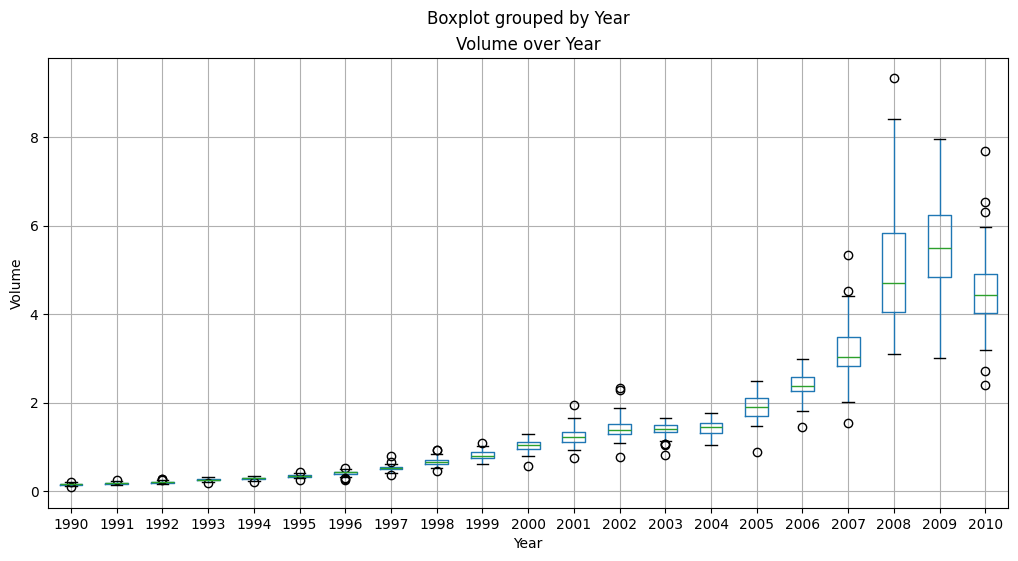

In [11]:
weekly.boxplot(column=['Volume'], by='Year', figsize=(12, 6))
plt.title('Volume over Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

The data indicates a rise in volume towards the end of the 90s and continues untill 2009, reaching each peak at the same time. However, there seems to be a decline after that, probably beause of the fincancial cricis.

In [12]:
weekly.Direction.describe()

,Direction
count,1089
unique,2
top,Up
freq,605


55% percent of the Direction data is Up, and the other 45% percent is Down

In [13]:
#@title 13b
X = weekly.loc[:, 'Lag1':'Volume']
y = pd.get_dummies(weekly['Direction'])['Up']

sm_logit = sm.Logit(y, sm.add_constant(X)).fit()
sm_logit.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                0.006580
Time:                        17:49:10   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Intercept, and Lag2 variables are looking statistically significant according to the associated p-values. Since the other Lag predictors are not statistically significant, we can still be skeptical about Lag2 too.

In [14]:
#@title 13c
X_sk = weekly.loc[:, 'Lag1':'Volume']
y_sk = weekly['Direction']

sk_logit = LogisticRegression(fit_intercept=True)
sk_logit.fit(X_sk, y_sk)
sk_logit.intercept_, sk_logit.coef_

(array([0.26685095]),
 array([[-0.04123352,  0.05839182, -0.01604123, -0.02777908, -0.01445306,
         -0.02273943]]))

In [15]:
acc_score = accuracy_score(y_sk, sk_logit.predict(X_sk))
print(f'Accuracy: {acc_score}')
print(f'Training Error: {1-acc_score}')

Accuracy: 0.5610651974288338
Training Error: 0.43893480257116624


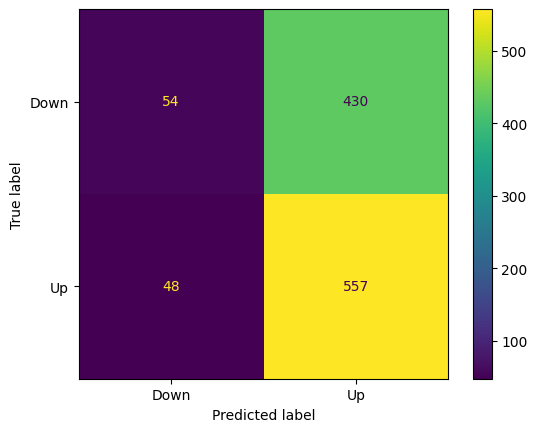

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_sk, sk_logit.predict(X_sk)), display_labels=['Down', 'Up'])
disp.plot()

By predicting Up every time, we would achieve a baseline accuracy of 55%. However, the logistic regression model only improves the accuracy slightly to 56%. This indicates that the model does not perform significantly better than the baseline, and it may not be suitable for this dataset. The model essentially relying o nthe intercept term to bias the output towards predicting Up.

In [17]:
#@title 13d
training_set = weekly[weekly.Year <= 2008]
test_set = weekly[weekly.Year >= 2009]

X_train = training_set.Lag2.values.reshape(-1, 1)
y_train = training_set.Direction

X_test = test_set.Lag2.values.reshape(-1, 1)
y_test = test_set.Direction

In [18]:
sk_logit_2 = LogisticRegression(fit_intercept=True)
sk_logit_2.fit(X_train, y_train)

sk_logit_2.intercept_, sk_logit_2.coef_

(array([0.20323048]), array([[0.0580307]]))

In [19]:
acc_score = accuracy_score(y_test, sk_logit_2.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.625
Test Error: 0.375


The accuracy rate of the new model using only Lag2 as a predictor is 62.5%, which is slightly higher than the baseline accuracy of 55%.

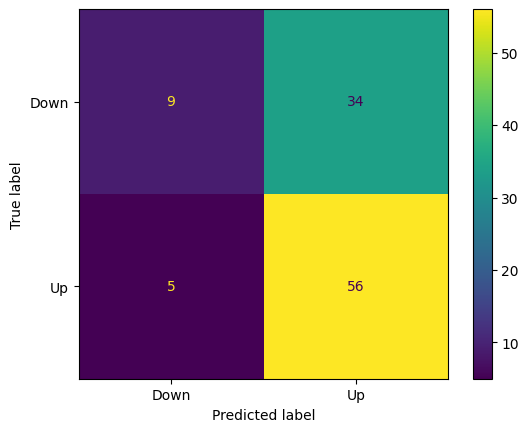

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, sk_logit_2.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [21]:
#@title 13.e (Linear Discriminant Analysis)
weekly_lda = LinearDiscriminantAnalysis()
weekly_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [22]:
acc_score = accuracy_score(y_test, weekly_lda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.625
Test Error: 0.375


The accuracy rate of the Linear Discriminant Analysis model using only Lag2 as a predictor is 62.5%.

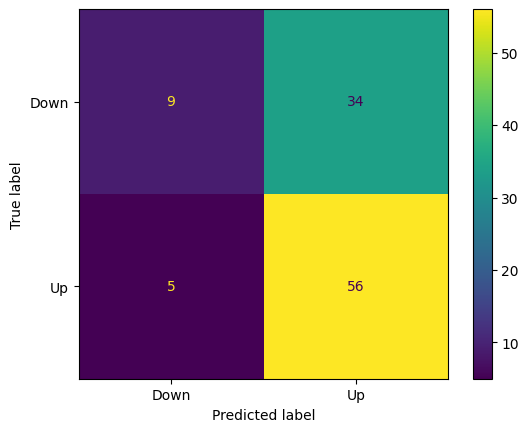

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, weekly_lda.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

Same issue as the model is biased towards predicting "Up"

In [24]:
#@title 13.f (Quadratic Discriminant Analysis)
weekly_qda = QuadraticDiscriminantAnalysis()
weekly_qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [25]:
acc_score = accuracy_score(y_test, weekly_qda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5865384615384616
Test Error: 0.41346153846153844


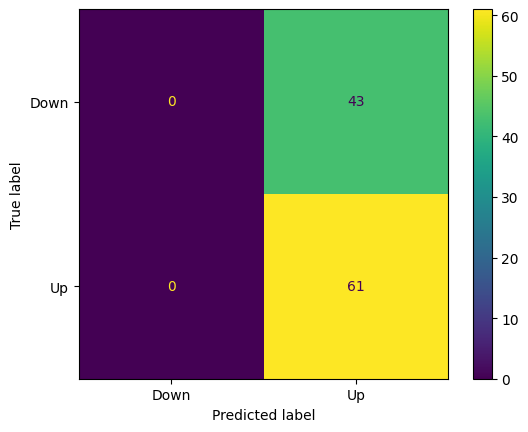

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, weekly_qda.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

The QDA model is performing worse. Its accuracy droped to 59% and it only predicts "Up". It is very biased

In [27]:
#@title 13.g KNN (with K=1)
weekly_knn = KNeighborsClassifier(n_neighbors=1)
weekly_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
acc_score = accuracy_score(y_test, weekly_knn.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.49038461538461536
Test Error: 0.5096153846153846


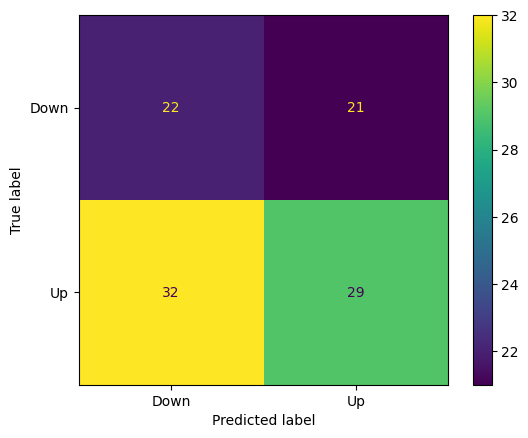

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, weekly_knn.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

The KNN model is perfomring worse than random guessing.

In [30]:
#@title 13.h Naive Bayes
weekly_naive_bayes = GaussianNB()
weekly_naive_bayes.fit(X_train, y_train)

GaussianNB()

In [31]:
acc_score = accuracy_score(y_test, weekly_naive_bayes.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5865384615384616
Test Error: 0.41346153846153844


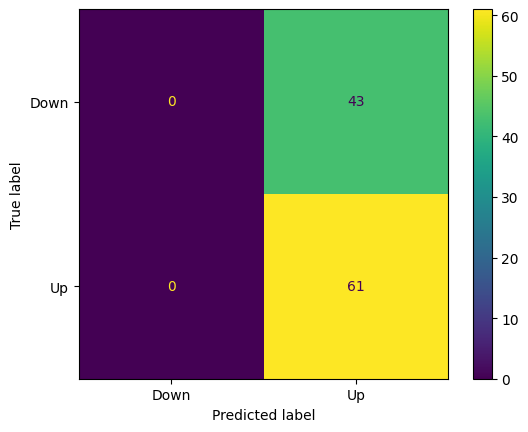

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, weekly_naive_bayes.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

Really low accuracy and very biased

## 13.i
If we use overall accuracy of the models as our criteria to choose the model with the best performance rates, we get Logistic Regression and LDA.

# Question 14

In [34]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [35]:
#@title 14.a
median = auto.mpg.median()
auto.loc[(auto['mpg'] >= median), 'mpg01'] = 1
auto.loc[(auto['mpg'] < median), 'mpg01'] = 0

In [37]:
# Replace '?' with NaN and convert 'horsepower' to numeric
auto['horsepower'] = auto['horsepower'].replace('?', np.nan).astype(float)

# Now calculate the correlation matrix
auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698,0.834672
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972,-0.760944
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664,-0.754522
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265,-0.757516
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084,0.346069
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314,0.430619
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000,0.509982
mpg01,0.834672,-0.760944,-0.754522,-0.667053,-0.757516,0.346069,0.430619,0.509982,1.000000


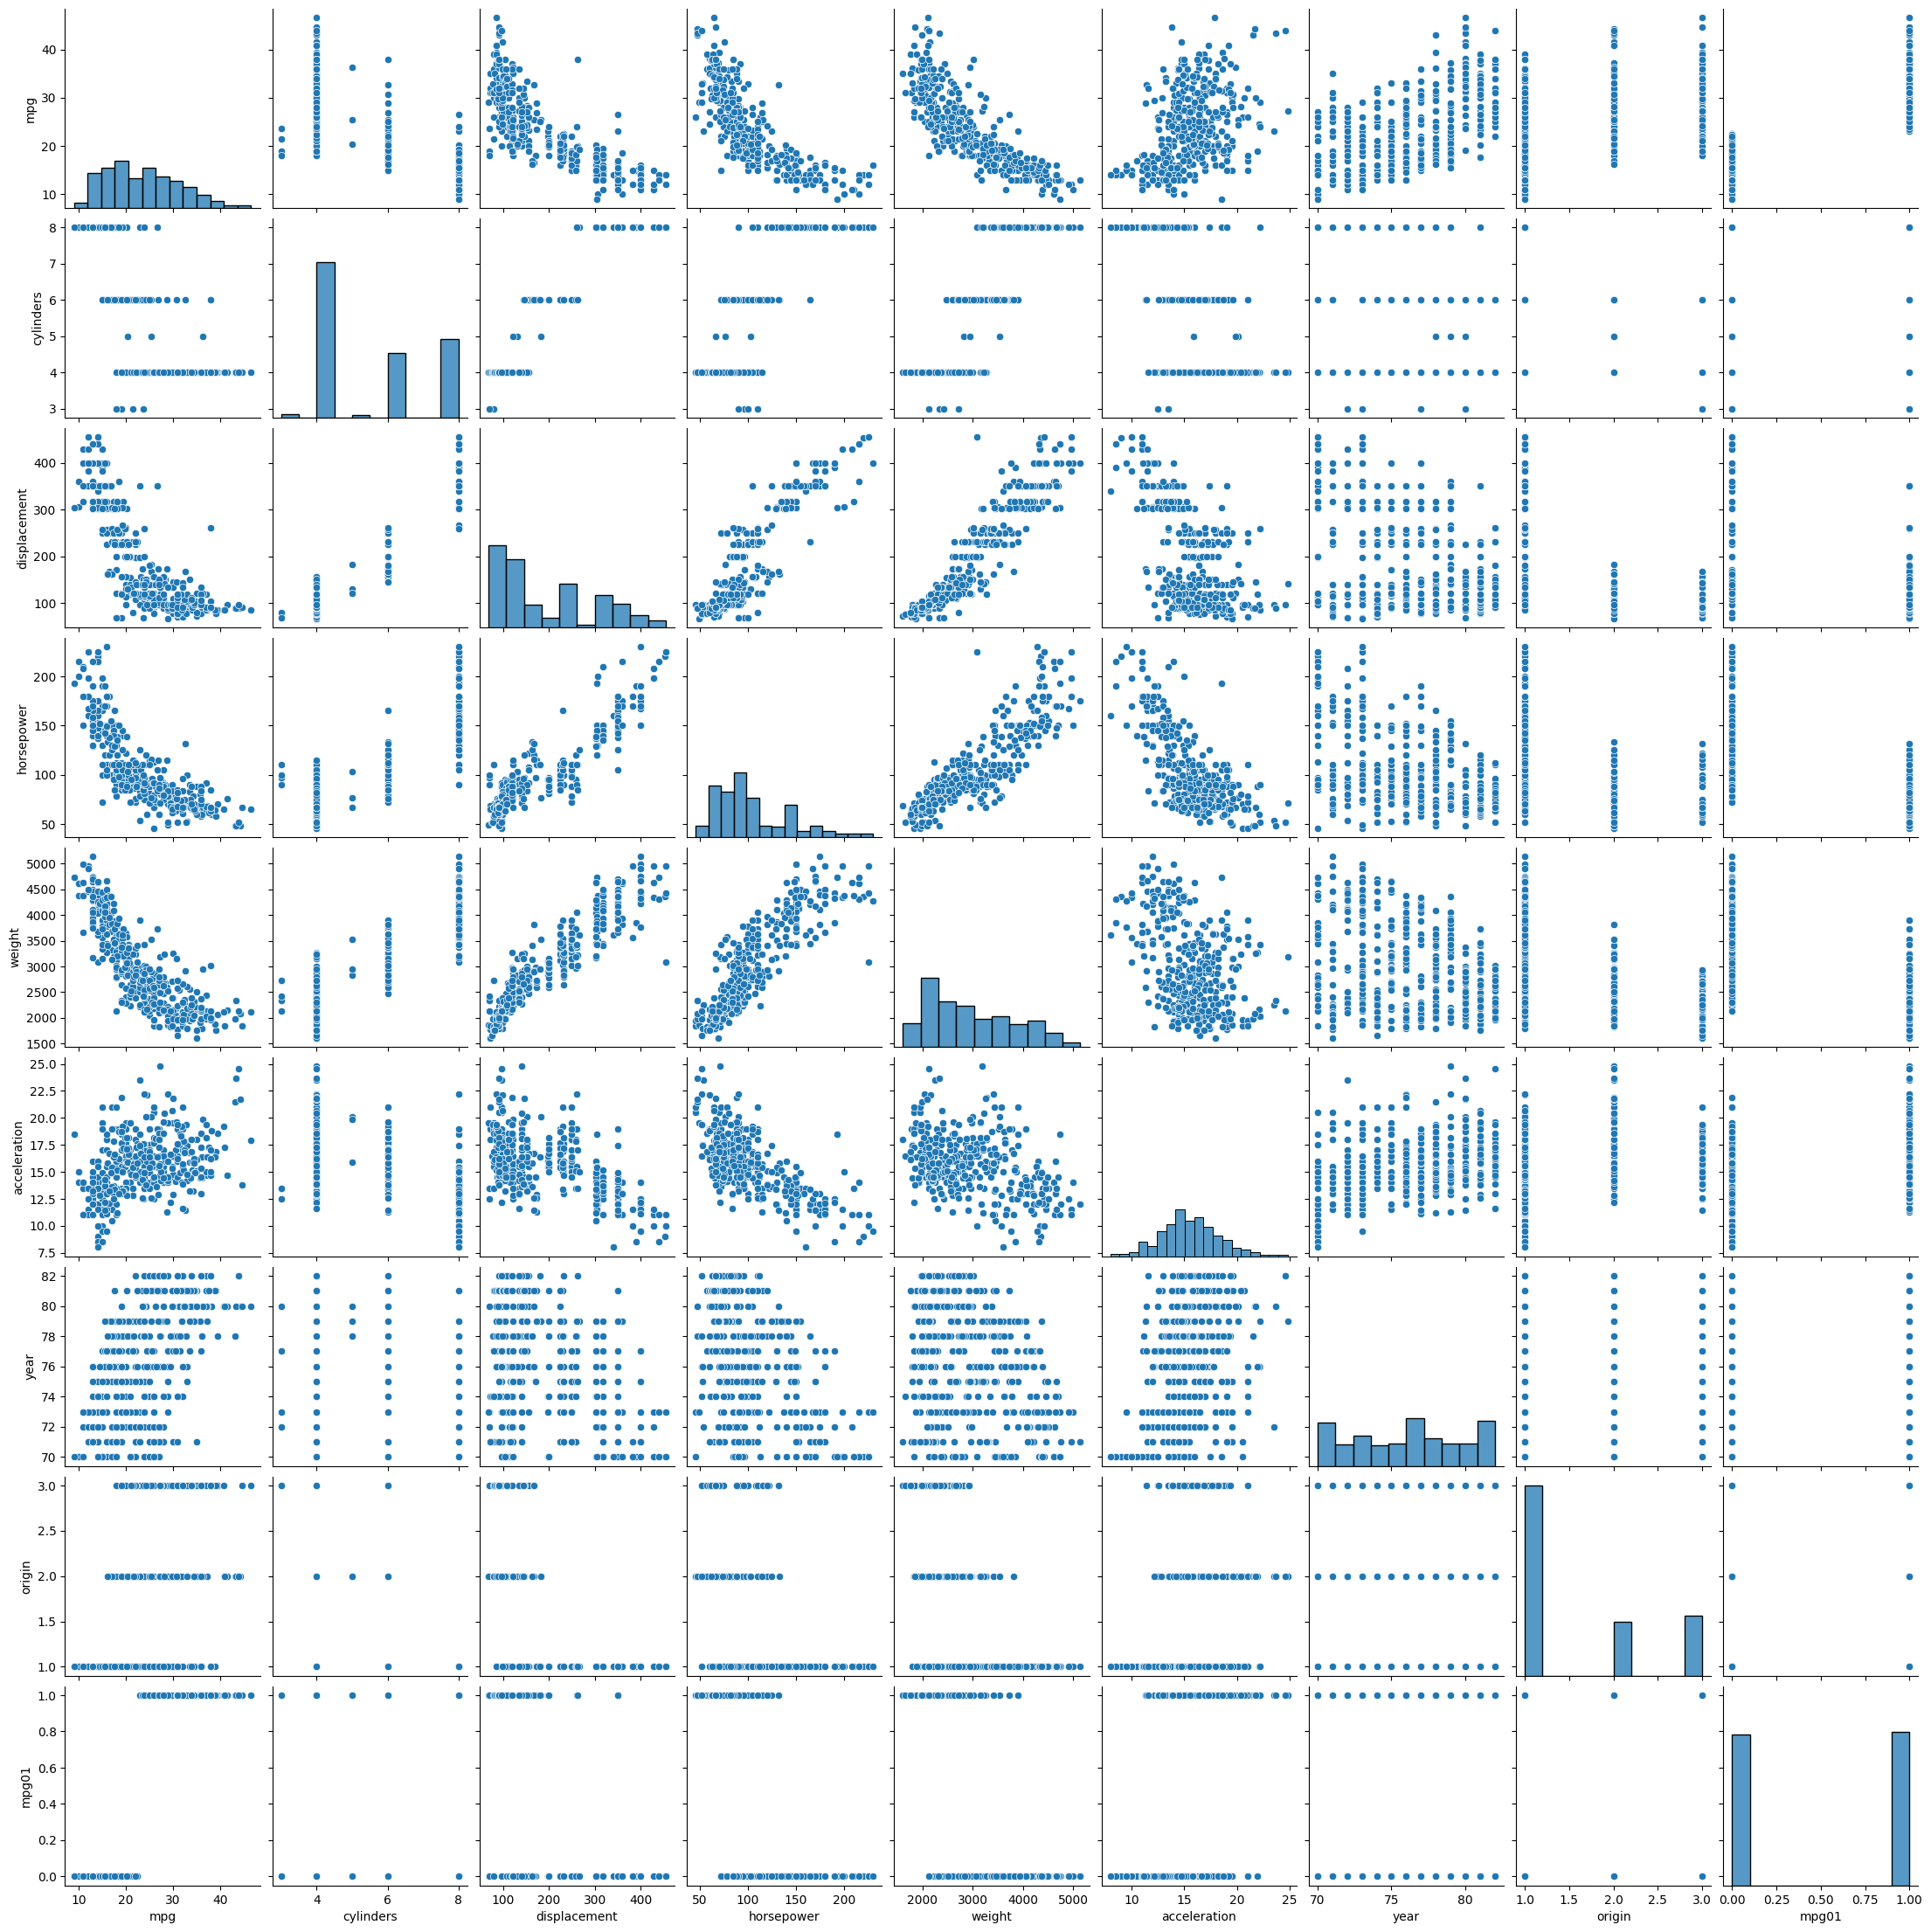

In [38]:
sns.pairplot(auto)

Based on the correlation matrix and pair plot, it appears that cylinders, displacement,and weight are the three strongest predictors of of mpg01.

In [39]:
#@title 14.c
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(auto.loc[:, ['cylinders', 'displacement', 'weight']], auto['mpg01'], train_size=0.7, random_state=1)

In [40]:
#@title 14.d LDA
auto_lda = LinearDiscriminantAnalysis()
auto_lda.fit(X_train, y_train)

acc_score = accuracy_score(y_test, auto_lda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'LDA - Test Error: {1-acc_score}')

Accuracy: 0.8916666666666667
LDA - Test Error: 0.10833333333333328


In [41]:
#@title 14.e QDA
auto_qda = QuadraticDiscriminantAnalysis()
auto_qda.fit(X_train, y_train)

acc_score = accuracy_score(y_test, auto_qda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'QDA - Test Error: {1-acc_score}')

Accuracy: 0.8833333333333333
QDA - Test Error: 0.1166666666666667


In [42]:
#@title 14.f Logistic Regression
auto_logit = LogisticRegression(fit_intercept=True)
auto_logit.fit(X_train, y_train)

acc_score = accuracy_score(y_test, auto_logit.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Logistic Regression - Test Error: {1-acc_score}')

Accuracy: 0.8833333333333333
Logistic Regression - Test Error: 0.1166666666666667


In [45]:
#@title 14.g Naive Bayes
auto_naiveBayes = GaussianNB()
auto_naiveBayes.fit(X_train, y_train)

acc_score = accuracy_score(y_test, auto_naiveBayes.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Naive Bayes - Test Error: {1-acc_score}')

Accuracy: 0.8916666666666667
Naive Bayes - Test Error: 0.10833333333333328


In [48]:
#@title 14.h KNN
k_values = [1 ,5, 10, 20, 50, 100]

for k in k_values:
    auto_knn = KNeighborsClassifier(n_neighbors=k)
    auto_knn.fit(X_train, y_train)

    acc_score = accuracy_score(y_test, auto_knn.predict(X_test))
    print(f'K-value: {k}')
    print(f'Accuracy: {acc_score}')
    print(f'KNN - Test Error: {1-acc_score}')
    print('-'*20)

K-value: 1
Accuracy: 0.875
KNN - Test Error: 0.125
--------------------
K-value: 5
Accuracy: 0.875
KNN - Test Error: 0.125
--------------------
K-value: 10
Accuracy: 0.8833333333333333
KNN - Test Error: 0.1166666666666667
--------------------
K-value: 20
Accuracy: 0.875
KNN - Test Error: 0.125
--------------------
K-value: 50
Accuracy: 0.875
KNN - Test Error: 0.125
--------------------
K-value: 100
Accuracy: 0.875
KNN - Test Error: 0.125
--------------------


KNN appears to be the best model